In [39]:
import pandas as pd
import numpy as np
from cherenkovdeconvolution import util
from mord import LogisticAT
from cherenkovdeconvolution import dsea
from sklearn.linear_model import LogisticRegression
from mord import LogisticSE
from sklearn.tree import ExtraTreeClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import power_transform
import cherenkovdeconvolution.stepsize as stepsize

#p.set_printoptions(threshold=np.inf)
#df = pd.read_csv('sample.csv')
df=pd.read_csv('sample.csv', nrows=500000)
#print(df.head(8))
#X = df[['SplineMPEDirectHitsD.dir_track_length',
#'SPEFit2_HVFitParams.nmini'                       ,
#'LineFitGeoSplit2.zenith',
#   'SplineMPE.zenith'    ,
#     'SplineMPE.azimuth' 
#       'SPEFit2GeoSplit1BayesianFitParams.nmini',
#       'SPEFit2Bayesian.x',
#       'VariousVariables.Cone_Angle',
#       'SPEFit2TimeSplit1FitParams.logl',
#       'weight_honda_h4a']]
#X = df[['SPEFit2Bayesian.x',
#        'SPEFit2BayesianFitParams.nmini',
#        'SPEFit2_HVFitParams.nmini',
#        'SplineMPE.zenith',
#        'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom',
#        'SplineMPEDirectHitsD.dir_track_length',
#        'SplineMPEDirectHitsICB.n_early_strings',
#        'SplineMPEDirectHitsICB.n_late_doms',
#        'SplineMPEDirectHitsICD.n_dir_strings',
#        'SplineMPEDirectHitsICE.n_late_strings',
#        'SplineMPETruncatedEnergy_SPICEMie_AllDOMS_MuEres.value',
#        'weight_honda_h4a',
#        'LineFitGeoSplit2.zenith',
#        'VariousVariables.Cone_Angle',
#        'SPEFit2GeoSplit1BayesianFitParams.nmini',
#        'SPEFit2TimeSplit1FitParams.logl']]
X = df[['SplineMPEDirectHitsICE.n_dir_doms',
        'VariousVariables.Cone_Angle',
        'SplineMPECramerRaoParams.variance_theta',
        'Borderness.Q_ratio_in_border',
        'SplineMPETruncatedEnergy_SPICEMie_BINS_MuEres.value',
        #'SplineMPETruncatesEnergy_SPICEMie_DOMS_Neutrino.energy',
        'SplineMPEDirectHitsICB.n_late_doms',
        'Dustyness.n_doms_in_dust',
        'LineFitGeoSplit1Params.n_hits',
        'SplineMPEDirectHitsICC.dir_track_hit_distribution_smoothness',
        'SPEFit2GeoSplit1BayesianFitParams.logl',
        'SplineMPECharacteristicsIC.avg_dom_dist_q_tot_dom']]
Y = df['MCPrimary.energy']
#'Dustyness.n_doms_in_dust','BestTrackDirectHitsICC.n_early_strings',
binning_E = np.logspace(np.log10(Y.min()-10),
np.log10(1e6), 13)   # creating 12 bins for the energy 



#Binning overflow & underflow manually
overflow = 1e8
bins_over = np.append(binning_E,overflow)
binning_E = bins_over

Y = np.digitize(Y, binning_E)  

Y = Y - 1
bin_1=[i for i in binning_E[:-1]]
bin_2=[i for i in binning_E[1:]]
bin_centers = np.mean([bin_1, bin_2], axis=0)

n_test = int(len(df)/10)

X_train = X.iloc[n_test:]#splitting the dataframe
Y_train = Y[n_test:]

X_test = X.iloc[:n_test]
Y_test = Y[:n_test]

f_true = util.fit_pdf(Y_test) 
f_true


array([0.14028, 0.27436, 0.23684, 0.15824, 0.09284, 0.0474 , 0.02588,
       0.01234, 0.00644, 0.00264, 0.00142, 0.00066, 0.00066])

In [38]:


f_ord=dsea(X_test, X_train, Y_train,LogisticSE(alpha=1.), K = 3)
f_ord

array([3.22372830e-03, 5.40486074e-02, 2.89053493e-01, 4.10241902e-01,
       1.85492345e-01, 4.69863009e-02, 8.98352266e-03, 1.68675278e-03,
       2.02501171e-04, 5.75669401e-05, 2.23612490e-05, 9.18274402e-07])

In [39]:


f_multi = dsea(X_test, X_train, Y_train,LogisticRegression(multi_class='multinomial',max_iter=100000), K=3)#doesnt work with the default solver?

/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jajaek/.local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [40]:


f_multi2 = dsea(X_test, X_train, Y_train,LogisticRegression(solver='saga',multi_class='multinomial',max_iter=10000), K=3)
f_multi2

array([0.04861655, 0.0698211 , 0.08373528, 0.09095279, 0.09557769,
       0.0964889 , 0.09670598, 0.09351049, 0.08799714, 0.07809829,
       0.08581873, 0.07267705])

In [41]:


f_extra = dsea(X_test, X_train, Y_train, ExtraTreeClassifier(), K=3) 

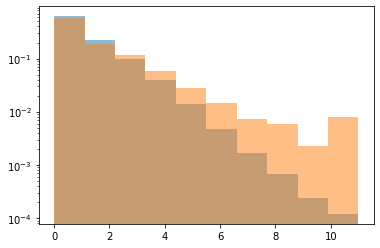

In [43]:
#plotting Multinomial Logistic Regression against f_true

plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_multi, alpha = 0.5,label='f_multi')
plt.yscale('log')
plt.show()

In [1]:
#plotting Multinomial Logistic Regression with the saga solver against f_true
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_multi2, alpha = 0.5,label='f_saga')
plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

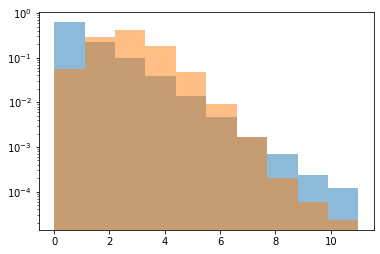

In [45]:
#plotting LogisticSE against f_true
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_ord, alpha = 0.5,label='f_ord')
plt.yscale('log')
plt.show()

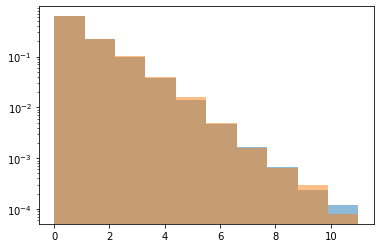

In [46]:
#plotting Extra Tree Classifier against f_true
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_extra, alpha = 0.5,label='f_extra')
plt.yscale('log')
plt.show()

In [41]:
#run dsea(LogisticSE) with boxcox transformed data
#from scipy import stats
#from scipy.special import boxcox1p


#transforming training and test data, while not transforming the target
#X_box[0]=stats.boxcox(df['SPEFit2Bayesian.x']) boxcox needs strictly positive data maybe yeo-johnson transform ist better suited
X_box= power_transform(X, method='yeo-johnson')    
X_btrain = X_box[n_test:]#splitting the dataframe
X_btest = X_box[:n_test]



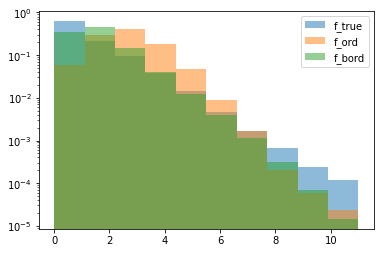

In [9]:
f_ord=([3.22372830e-03, 5.40486074e-02, 2.89053493e-01, 4.10241902e-01,
       1.85492345e-01, 4.69863009e-02, 8.98352266e-03, 1.68675278e-03,
       2.02501171e-04, 5.75669401e-05, 2.23612490e-05, 9.18274402e-07])

f_bord=dsea(X_btest, X_btrain, Y_train,LogisticSE(alpha=1.), K = 3)

plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_ord, alpha = 0.5,label='f_ord')
plt.hist(range(12), weights = f_bord, alpha = 0.5,label='f_bord')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [ ]:
#from mord import LogisticAT
f_AT=dsea(X_btest, X_btrain, Y_train,LogisticAT(alpha=1.), K = 3)

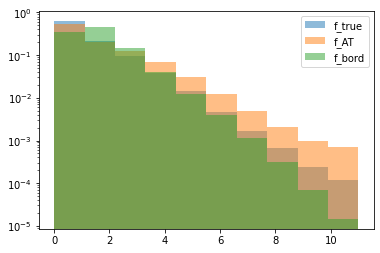

In [ ]:
plt.hist(range(12), weights = f_true, alpha = 0.5,label ='f_true')
plt.hist(range(12), weights = f_AT, alpha = 0.5,label='f_AT')
plt.hist(range(12), weights = f_bord, alpha = 0.5,label='f_bord')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

In [42]:
#logistic AT with decaying stepsize(unstransformed data)
def inspect_alpha(k, alpha, chi2s, f): # you can define custom inspection methods to investigate DSEA
    print(alpha)

# There are two decay rates, the first of which is comparably slow
alpha_mul = stepsize.decay_mul(0.5)
f_AT_mul = dsea(X_test, X_train, Y_train, LogisticAT(alpha=1.), K = 3, inspect = inspect_alpha, alpha = alpha_mul)


0
1
2
3


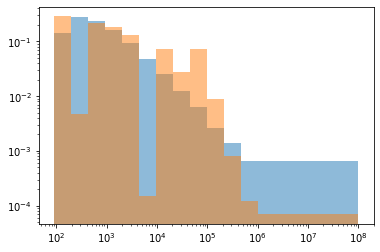

In [43]:
plt.hist(bin_centers, bins = binning_E, weights = f_true, alpha = 0.5)
plt.hist(bin_centers, bins = binning_E, weights = f_AT_mul, alpha = 0.5)
plt.gca().set_xscale('log')
plt.yscale('log')
plt.show()

0
1
2
3


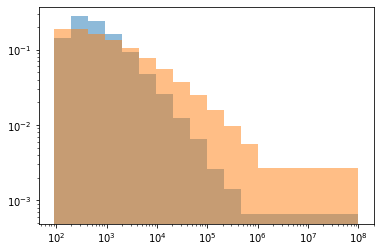

In [44]:
#logistic AT with decaying stepsize(transformed data)
def inspect_alpha(k, alpha, chi2s, f):
    print(alpha)


alpha_mul = stepsize.decay_mul(0.5)
f_AT_mul,contr = dsea(X_btest, X_btrain, Y_train, LogisticAT(), K = 3, inspect = inspect_alpha, alpha = alpha_mul,return_contributions = True)
plt.hist(bin_centers, bins = binning_E, weights = f_true, alpha = 0.5)
plt.hist(bin_centers, bins = binning_E, weights = f_AT_mul, alpha = 0.5)
plt.gca().set_xscale('log')
plt.yscale('log')
plt.show()

In [14]:
def rate_contr(contr):
    rating=0
    indices=[]
    contr_1st=contr.argsort()[:,-1]#returns indices of the highest value
    contr_2nd=contr.argsort()[:,-2]#return indices of the 2nd highest value
    
    contr_gap=contr_1st-contr_2nd#array of distances between the highest and 2nd highest bin
    for i in range(len(contr)):
        if contr_gap[i]>2:
            rating=rating+1
            indices.append(i)
        elif contr_gap[i]<(-2):
            rating=rating+1
            indices.append(i)
            
    return rating, indices     

x,y=rate_contr(contr)
x

0

(array([5.34220490e-01, 2.65766030e-01, 1.26314983e-01, 4.76581686e-02,
        1.64572999e-02, 5.72933861e-03, 2.16835101e-03, 9.20888521e-04,
        4.34162528e-04, 3.30287367e-04]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 [<matplotlib.patches.Polygon at 0x7f7cd7257fa0>])

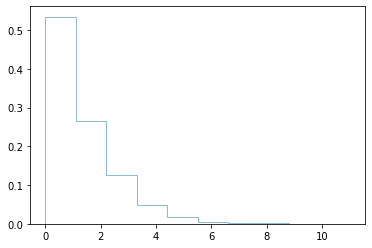

In [17]:
plt.hist(range(12), weights = contr[3], alpha = 0.5, histtype = 'step')

0
1
2
3
4
5


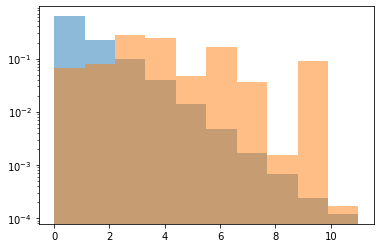

In [18]:
#logistic AT with exponential decaying stepsize(transformed data)
alpha_exp = stepsize.decay_exp(0.5, 2.0)
f_AT_exp = dsea(X_test, X_train, Y_train, LogisticAT(), K = 5, inspect = inspect_alpha,  alpha = alpha_exp)
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_AT_exp, alpha = 0.5)
plt.yscale('log')
plt.show()

In [26]:
#feature selection on logisticAT
from sklearn.feature_selection import RFE
estimator= LogisticAT()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_box,Y)
selector.ranking_

array([6, 3, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 8, 7, 2, 1])

In [27]:
#just keeping the best ranked features
X_RFE=selector.transform(X_box)
X_rfetrain = X_RFE[n_test:]#splitting the dataframe
X_rfetest = X_RFE[:n_test]


0
1
2
3
4
5


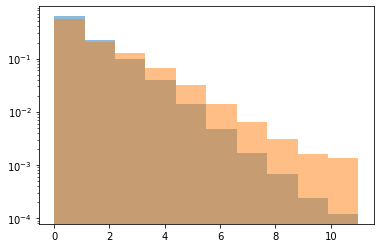

In [29]:
#logisticAT on the best features with decaying stepsize
def inspect_alpha(k, alpha, chi2s, f):
    print(alpha)


alpha_mul = stepsize.decay_mul(0.5)
f_AT_mul = dsea(X_rfetest, X_rfetrain, Y_train, LogisticAT(), K = 5, inspect = inspect_alpha, alpha = alpha_mul)
plt.hist(range(12), weights = f_true, alpha = 0.5)
plt.hist(range(12), weights = f_AT_mul, alpha = 0.5)
plt.yscale('log')
plt.show()